In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
# Creating dataframe df and reading it
df=pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data')
df.set_index('name',inplace=True)

# Getiing top 5 value 
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Getting shape of data
print(df.shape)

# Getting information of data 
df.info()

(195, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, phon_R01_S01_1 to phon_R01_S50_6
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          193 non-null    float64
 7   Jitter:DDP        194 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status         

In [5]:
# Getting mean , max & min value , std 
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:

df.isna().mean()

MDVP:Fo(Hz)         0.000000
MDVP:Fhi(Hz)        0.000000
MDVP:Flo(Hz)        0.000000
MDVP:Jitter(%)      0.000000
MDVP:Jitter(Abs)    0.000000
MDVP:RAP            0.000000
MDVP:PPQ            0.010256
Jitter:DDP          0.005128
MDVP:Shimmer        0.000000
MDVP:Shimmer(dB)    0.000000
Shimmer:APQ3        0.000000
Shimmer:APQ5        0.000000
MDVP:APQ            0.000000
Shimmer:DDA         0.000000
NHR                 0.000000
HNR                 0.000000
status              0.000000
RPDE                0.000000
DFA                 0.000000
spread1             0.000000
spread2             0.000000
D2                  0.000000
PPE                 0.000000
dtype: float64

In [7]:
# dropping null 
df=df.dropna()

In [8]:
df.drop('status',axis=1).corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400327,0.602803,-0.106765,-0.373000,-0.066314,-0.101633,-0.066332,-0.087435,-0.062556,...,-0.066798,-0.083763,-0.013346,0.041347,-0.371439,-0.448063,-0.400615,-0.228277,0.201440,-0.359729
MDVP:Fhi(Hz),0.400327,1.000000,0.084839,0.105580,-0.025727,0.100042,0.094352,0.100015,0.005164,0.046498,...,0.007741,-0.000869,0.166263,-0.029451,-0.108345,-0.342681,-0.072252,0.004140,0.182949,-0.065420
MDVP:Flo(Hz),0.602803,0.084839,1.000000,-0.136072,-0.275528,-0.096635,-0.092359,-0.096603,-0.141103,-0.115316,...,-0.102637,-0.148017,-0.106473,0.201967,-0.410294,-0.054428,-0.394259,-0.246411,-0.079596,-0.339180
MDVP:Jitter(%),-0.106765,0.105580,-0.136072,1.000000,0.935258,0.990308,0.974104,0.990309,0.767399,0.802896,...,0.756514,0.744918,0.906811,-0.727884,0.355399,0.098116,0.690928,0.380236,0.429830,0.719109
MDVP:Jitter(Abs),-0.373000,-0.025727,-0.275528,0.935258,1.000000,0.922751,0.897142,0.922752,0.700846,0.714286,...,0.645927,0.694730,0.834742,-0.654049,0.436213,0.174904,0.732451,0.381336,0.303092,0.744991
MDVP:RAP,-0.066314,0.100042,-0.096635,0.990308,0.922751,1.000000,0.957121,1.000000,0.758212,0.789464,...,0.735876,0.743606,0.919274,-0.722339,0.338044,0.063601,0.646316,0.320029,0.424047,0.669057
MDVP:PPQ,-0.101633,0.094352,-0.092359,0.974104,0.897142,0.957121,1.000000,0.957123,0.796449,0.838157,...,0.802846,0.762046,0.844012,-0.731760,0.327855,0.196297,0.714687,0.404053,0.409698,0.768204
Jitter:DDP,-0.066332,0.100015,-0.096603,0.990309,0.922752,1.000000,0.957123,1.000000,0.758186,0.789433,...,0.735859,0.743587,0.919301,-0.722288,0.337982,0.063544,0.646315,0.319997,0.423996,0.669063
MDVP:Shimmer,-0.087435,0.005164,-0.141103,0.767399,0.700846,0.758212,0.796449,0.758186,1.000000,0.987164,...,0.949841,0.987572,0.720967,-0.835952,0.444032,0.160499,0.651883,0.450566,0.505347,0.690998
MDVP:Shimmer(dB),-0.062556,0.046498,-0.115316,0.802896,0.714286,0.789464,0.838157,0.789433,0.987164,1.000000,...,0.960779,0.962987,0.743362,-0.828633,0.406784,0.165608,0.649745,0.452798,0.510674,0.692418


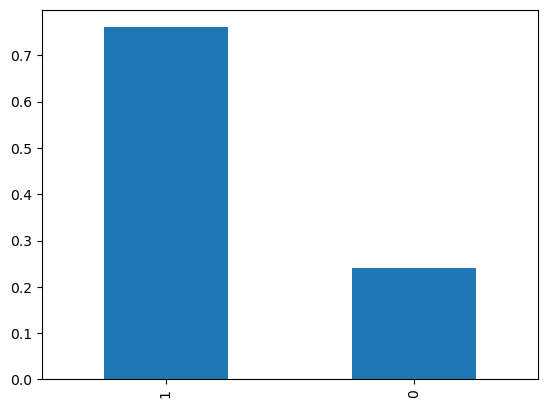

In [9]:
#chech whether data s balanced or not
df['status'].value_counts(normalize=True).plot(kind='bar');
#we see that 

In [10]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
#target and feature data segregation
target='status'
features=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
X=df[features]
y=df[target]

In [12]:
X.shape,y.shape

((192, 22), (192,))

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [14]:
#Baseline accyracy
y_base_accuracy=y_train.value_counts(normalize=True).max()
y_base_accuracy

0.7712418300653595

In [19]:
scale=StandardScaler()
X_train=pd.DataFrame(scale.fit_transform(X_train),columns=X.columns)
X_test=pd.DataFrame(scale.transform(X_test),columns=X.columns)

# LogisticRegression

In [20]:
lm=LogisticRegression()
rfe=RFE(lm,n_features_to_select=15)
rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True False  True False  True
  True False False  True  True False  True  True  True  True]
[1 1 7 1 1 1 5 1 3 1 4 1 1 2 8 1 1 6 1 1 1 1]


In [21]:
col=X_train.columns[rfe.support_]
X_train=X_train[col]
X_test=X_test[col]

In [22]:
lm.fit(X_train,y_train)

LogisticRegression()

In [23]:
print(lm.score(X_train,y_train))
print(lm.score(X_test,y_test))

#So, our accuracy improved by roughly 10%

0.8823529411764706
0.8717948717948718


<AxesSubplot:>

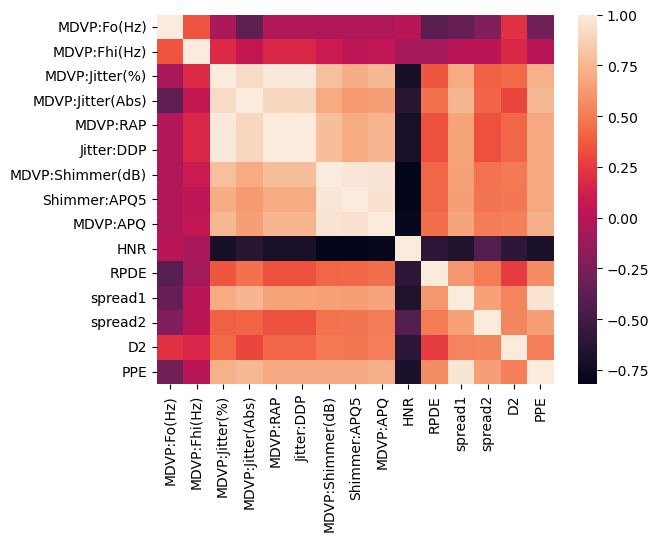

In [24]:
sns.heatmap(X_train.corr())

# model 2- Decision tree

In [25]:
#model 2- Decision tree
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [26]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [27]:
#accuracy scores
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


# model3 - Random Forest

In [28]:
#model3 - Random Forest
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [29]:
clf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [30]:
cv_acc_scores = cross_val_score(clf,X_train,y_train,cv=5,n_jobs=-1)
print(cv_acc_scores)

[0.87096774 0.87096774 0.93548387 0.96666667 0.9       ]


In [32]:
params = {
    'randomforestclassifier__n_estimators':range(25,100,10),
    'randomforestclassifier__max_depth':range(10,21,1)
}
params

{'randomforestclassifier__n_estimators': range(25, 100, 10),
 'randomforestclassifier__max_depth': range(10, 21)}

In [33]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [34]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 21),
                         'randomforestclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [35]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.8717948717948718


# Model 4 - Gradiant boosting classifier

In [36]:
#Model 4 - Gradiant boosting classifier
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])


In [37]:
params = {
    'gradientboostingclassifier__n_estimators':range(25,100,10),
    'gradientboostingclassifier__max_depth':range(10,21,1)
}
params

{'gradientboostingclassifier__n_estimators': range(25, 100, 10),
 'gradientboostingclassifier__max_depth': range(10, 21)}

In [38]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [39]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(10, 21),
                         'gradientboostingclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [40]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.8974358974358975


# Model 5 - Adaboost classifier

In [41]:
#Model 5 - Adaboost classifier
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

clf = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(random_state=42)
)
print(clf)

(153, 22)
(153,)
(39, 22)
(39,)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])


In [42]:
params = {
    'adaboostclassifier__n_estimators':range(25,100,10)
}
params

{'adaboostclassifier__n_estimators': range(25, 100, 10)}

In [43]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [44]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__n_estimators': range(25, 100, 10)},
             verbose=1)

In [45]:
print('training accuracy ={}'.format(model.score(X_train,y_train)))
print('test accuracy ={}'.format(model.score(X_test,y_test)))

training accuracy =1.0
test accuracy =0.7948717948717948


# Best model


In [46]:
#Best model
#model 2- Decision tree
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(153, 22)
(153,)
(39, 22)
(39,)


In [48]:
dt = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [49]:
#accuracy scores
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8974358974358975


In [50]:
y_pred2=dt.predict(X_test)

In [51]:
cnf=confusion_matrix(y_test,y_pred2)
print('training accuracy = {}'.format(round(accuracy_score(y_train,dt.predict(X_train)),2)))
print('test accuracy = {}'.format(round((cnf[0][0]+cnf[1][1])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))
print('test precision = {}'.format(round((cnf[1][1])/(cnf[0][1]+cnf[1][1]),2)))
print('test recall = {}'.format(round((cnf[1][1])/(cnf[1][0]+cnf[1][1]),2)))
print('test error = {}'.format(round((cnf[0][1]+cnf[1][0])/(cnf[0][0]+cnf[0][1]+cnf[1][0]+cnf[1][1]),2)))

training accuracy = 1.0
test accuracy = 0.9
test precision = 0.93
test recall = 0.93
test error = 0.1


In [52]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        28

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



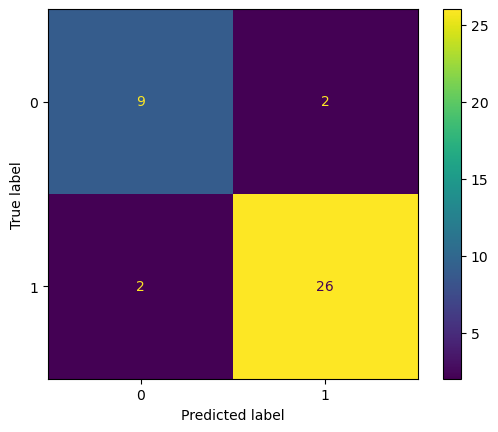

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)

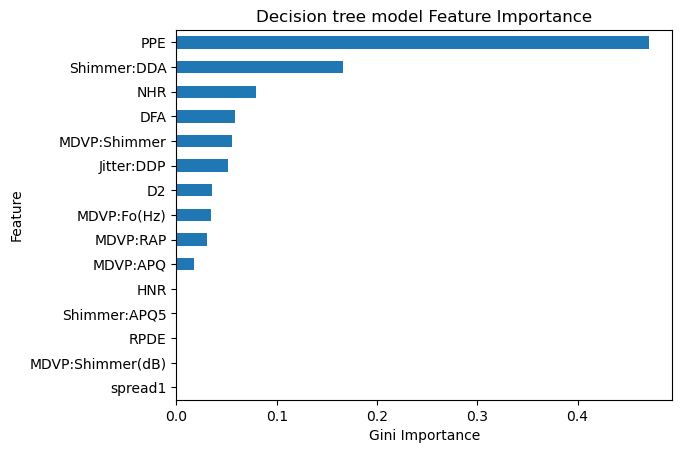

In [54]:
#Feature Importance
# Get importances
importances = dt.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()
# plot
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Decision tree model Feature Importance");

In [55]:
feat_imp.tail(9).sum() # shows that more than 98 % if data is segregated by above top 8 variables

0.9821941765776485